In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' %x)

In [3]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [4]:
data=('/content/Drive/MyDrive/PDS project - 1/austo_automobile.csv')

In [5]:
da=pd.read_csv(data)

In [6]:
da.shape

(1581, 14)

In [7]:
da.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.000,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.000,139900,57000,SUV


In [8]:
da.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.000,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.000,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.000,31600,31000,Hatchback


In [9]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [10]:
da.isnull().sum()

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [11]:
pd.DataFrame({'count':da.isnull().sum()[da.isnull().sum()>0],'percentage':da.isnull().sum()[da.isnull().sum()>0]/da.shape[0]*100})

,count,percentage
Gender,53,3.352
Partner_salary,106,6.705


In [12]:
da['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [13]:
da['Gender']=da['Gender'].fillna(da['Gender'].mode()[0])

In [14]:
pd.DataFrame({'count':da.isnull().sum()[da.isnull().sum()>0],'percentage':da.isnull().sum()[da.isnull().sum()>0]/da.shape[0]*100})

,count,percentage
Partner_salary,106,6.705


In [15]:
for i in da.columns:
  print(f"unique values in column'{i}':")
  print(da[i].unique())
  print("-"*40)

unique values in column'Age':
[53 52 50 49 47 46 45 51 54 48 44 43 42 41 40 39 38 37 36 35 34 33 32 31
 30 29 28 27 26 25 24 23 22]
----------------------------------------
unique values in column'Gender':
['Male' 'Femal' 'Female' 'Femle']
----------------------------------------
unique values in column'Profession':
['Business' 'Salaried']
----------------------------------------
unique values in column'Marital_status':
['Married' 'Single']
----------------------------------------
unique values in column'Education':
['Post Graduate' 'Graduate']
----------------------------------------
unique values in column'No_of_Dependents':
[4 3 2 1 0]
----------------------------------------
unique values in column'Personal_loan':
['No' 'Yes']
----------------------------------------
unique values in column'House_loan':
['No' 'Yes']
----------------------------------------
unique values in column'Partner_working':
['Yes' 'No']
----------------------------------------
unique values in column'Salary'

In [16]:
da['Partner_salary'].mean().round()

20226.0

In [17]:
da['Partner_salary']=da['Partner_salary'].fillna(da['Partner_salary'].mean()).round()

In [18]:
da['Partner_salary'].unique()

array([70700., 70300., 60700., 60200., 60500., 50800., 40400.,     0.,
       70600., 60600., 60300., 45500., 40200., 40700.,   600.,   700.,
       27800., 70000., 40100., 40900., 27000., 20226., 40500., 50400.,
       80400., 60900., 60100., 70200., 30000., 40300., 40800., 70800.,
         900., 45000., 40600., 50700., 80500., 27700., 35800., 26600.,
       60000., 27900., 60800., 40000., 70100., 38100., 38200., 30200.,
       38500., 50900., 35100., 38700., 38300., 38900., 23200., 24700.,
       30800., 28100., 38400., 38000., 23100., 30100., 25700., 70400.,
         200., 30900., 26100., 45700.,   400., 28200., 70900., 38800.,
       45200., 26800., 60400., 30300., 25800.,   800., 38600., 24500.,
       30700., 28500., 24900., 70500., 35900., 30500., 28900., 27200.,
       45900., 25300., 35600., 25000., 25200., 26300., 35700., 23800.,
       32700., 30600., 45600., 28000., 32600., 28600., 25100., 26700.,
       24200., 25900., 22100., 25400., 28400., 28300., 25500., 24000.,
      

In [19]:
pd.DataFrame({'mode':da['Make'].value_counts(), 'Percentage':da['Make'].value_counts()/da.shape[0]*100})

,mode,Percentage
Make,,
Sedan,702,44.402
Hatchback,582,36.812
SUV,297,18.786


In [20]:
da.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000,1581.000,1581.000,1581.000,1581.000,1581.000
mean,31.922,2.458,60392.220,20225.589,79625.996,35597.723
std,8.426,0.943,14674.825,18905.184,25545.858,13633.637
min,22.000,0.000,30000.000,0.000,30000.000,18000.000
25%,25.000,2.000,51900.000,0.000,60500.000,25000.000
50%,29.000,2.000,59500.000,24900.000,78000.000,31000.000
75%,38.000,3.000,71800.000,38000.000,95900.000,47000.000
max,54.000,4.000,99300.000,80500.000,171000.000,70000.000


In [21]:
da['Gender'].value_counts()

,count
Gender,
Male,1252
Female,327
Femal,1
Femle,1


In [22]:
da.loc[da['Gender'].isin(['Femal', 'Femle'])]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800,61000,SUV
305,40,Femle,Business,Married,Post Graduate,4,No,No,Yes,70000,70800.000,140800,65000,SUV


In [23]:
da['Gender']=da['Gender'].replace(['Femal','Femle'],'Female')

In [24]:
da['Gender'].value_counts()

,count
Gender,
Male,1252
Female,329


In [25]:
numeric_column = ['Age','No_of_Dependents',	'Salary',	'Partner_salary',	'Total_salary',	'Price']

In [26]:
q1 = da[numeric_column].quantile(0.25)
q3 = da[numeric_column].quantile(0.75)

iqr = q3-q1


lower_whisker = q1-1.5*iqr
upper_whisker = q3+1.5*iqr

print(lower_whisker)
print(upper_whisker)

Age                     5.500
No_of_Dependents        0.500
Salary              22050.000
Partner_salary     -57000.000
Total_salary         7400.000
Price               -8000.000
dtype: float64
Age                    57.500
No_of_Dependents        4.500
Salary             101650.000
Partner_salary      95000.000
Total_salary       149000.000
Price               80000.000
dtype: float64


In [27]:
print(((da[numeric_column]< lower_whisker) | (da[numeric_column]> upper_whisker)).sum())
((da[numeric_column]< lower_whisker) | (da[numeric_column]> upper_whisker)).sum()/da[numeric_column].shape[0]*100

Age                  0
No_of_Dependents    20
Salary               0
Partner_salary       0
Total_salary        27
Price                0
dtype: int64


,0
Age,0.000
No_of_Dependents,1.265
Salary,0.000
Partner_salary,0.000
Total_salary,1.708
Price,0.000


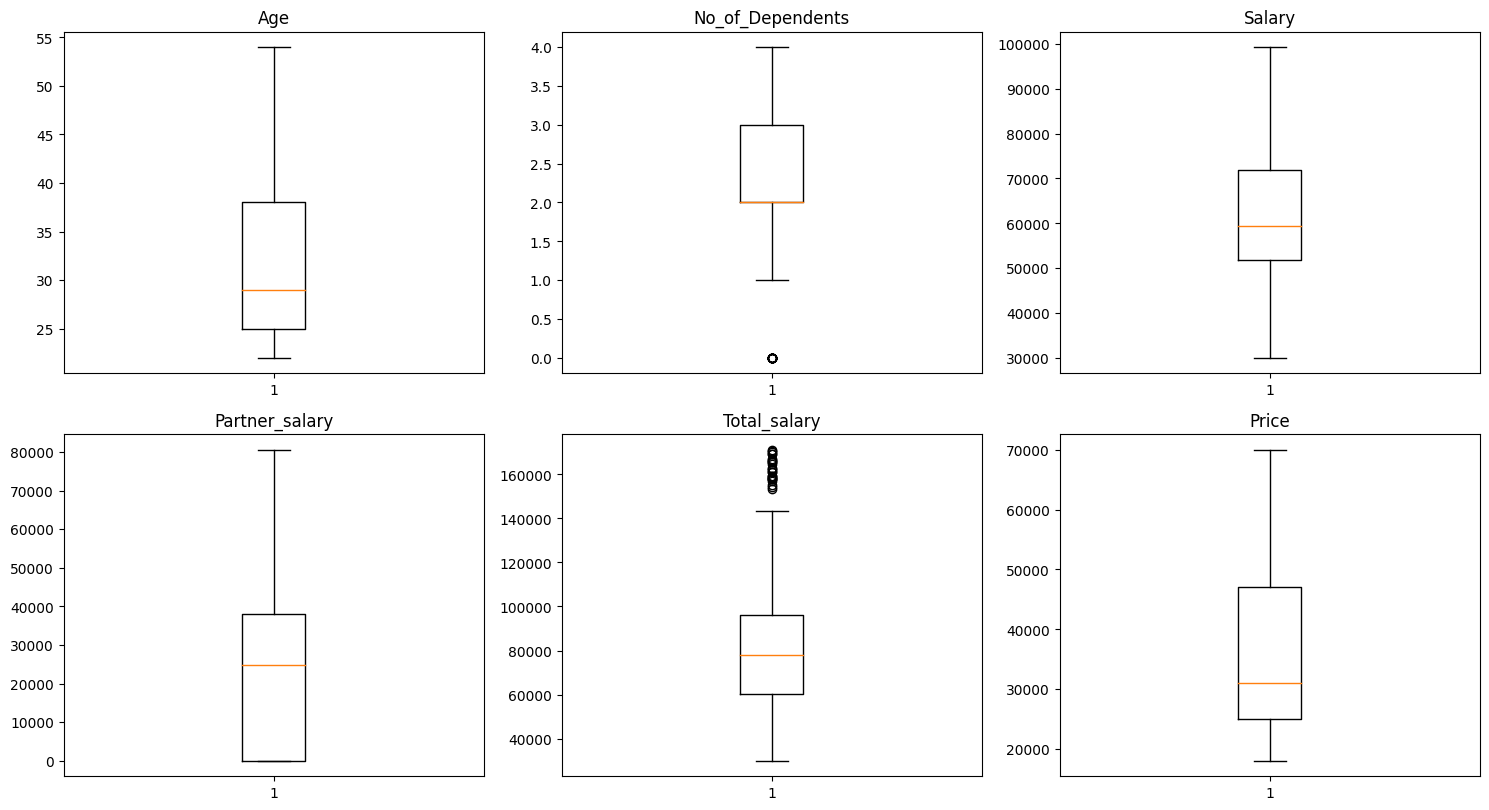

In [28]:
plt.figure(figsize=(15,12))
for i, variable in enumerate(numeric_column):
  plt.subplot(3,3, i+1)
  plt.boxplot(da[variable], whis=1.5)
  plt.tight_layout()
  plt.title(variable)

In [29]:
def treat_outliers(df,col):
  q1= df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_whisker=q1-1.5*iqr
  upper_whisker=q3+1.5*iqr
  df[col]=np.clip(df[col], lower_whisker, upper_whisker)
  return(da)

<Axes: xlabel='Total_salary'>

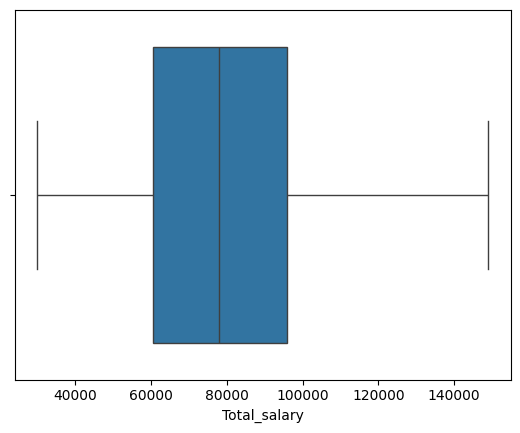

In [30]:
da=treat_outliers(da,'Total_salary')
sns.boxplot(data=da,x='Total_salary')

In [31]:
da['Total_salary']=da['Total_salary'].astype(int)

In [32]:
# univariate analysis

In [33]:
# numeric column

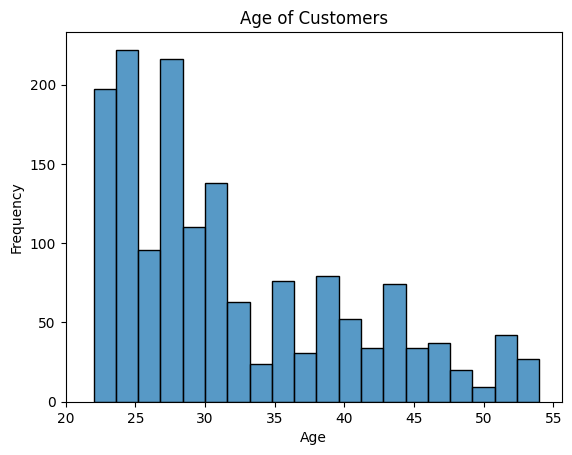

In [34]:
sns.histplot(data=da, x='Age', bins=20, edgecolor='k')
plt.title('Age of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(20,60,5));

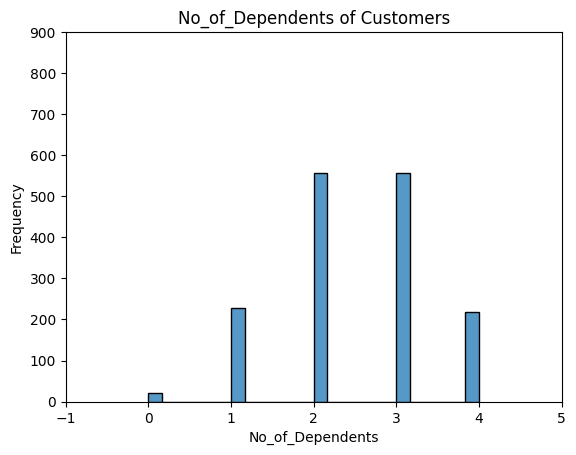

In [35]:
sns.histplot(data=da, x='No_of_Dependents')
plt.title('No_of_Dependents of Customers')
plt.xlabel('No_of_Dependents')
plt.ylabel('Frequency')
plt.xticks(np.arange(-1,5.5,1))
plt.yticks(np.arange(0,1000,100));

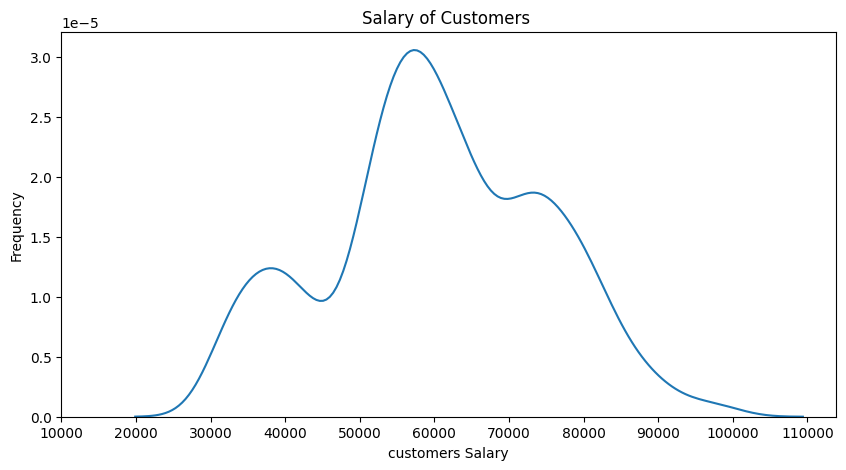

In [36]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=da, x='Salary')
plt.title('Salary of Customers ')
plt.xlabel('customers Salary')
plt.ylabel('Frequency')
plt.xticks(np.arange(10000,120000,10000));

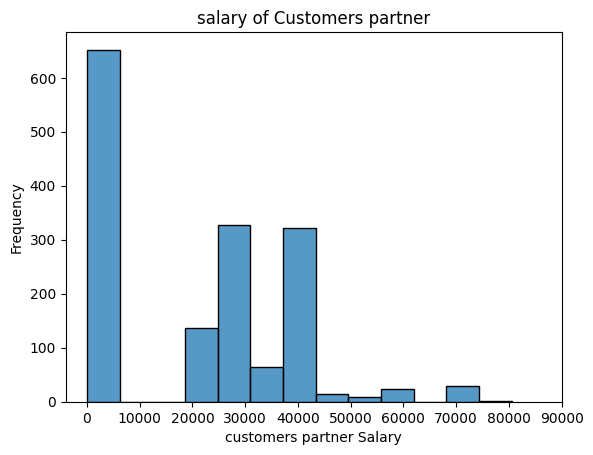

In [37]:
sns.histplot(data=da, x='Partner_salary')
plt.title('salary of Customers partner')
plt.xlabel('customers partner Salary')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,95000,10000));

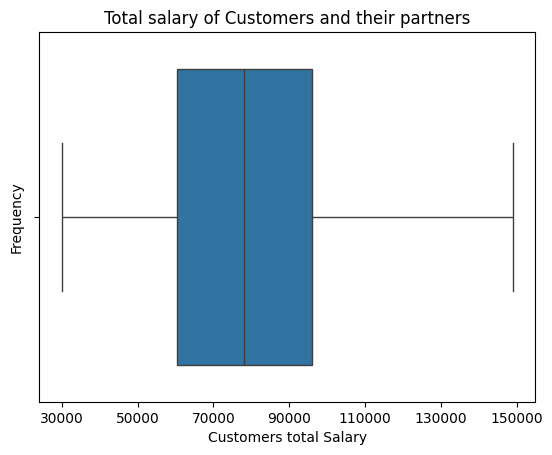

In [38]:
sns.boxplot(data=da, x='Total_salary')
plt.title('Total salary of Customers and their partners')
plt.xlabel('Customers total Salary')
plt.ylabel('Frequency')
plt.xticks(np.arange(30000,160000,20000));

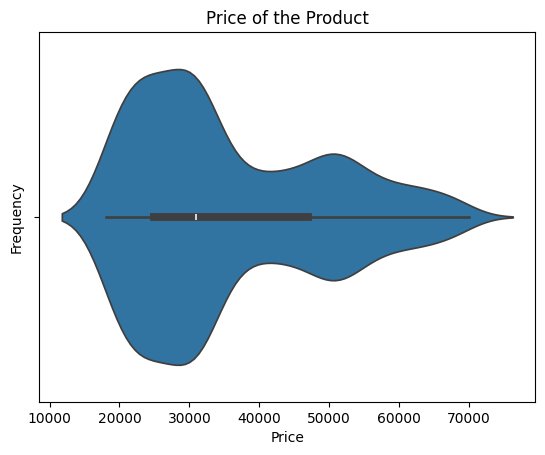

In [39]:
sns.violinplot(data=da, x='Price')
plt.title('Price of the Product')
plt.xlabel('Price')
plt.ylabel('Frequency');

In [40]:
# categorical column

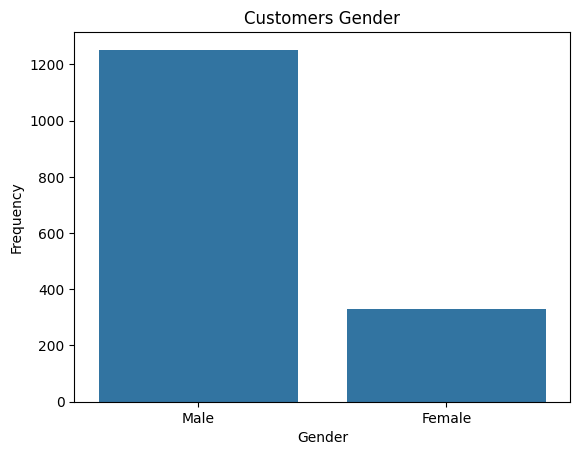

In [41]:
sns.countplot(data=da, x='Gender')
plt.title('Customers Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency');

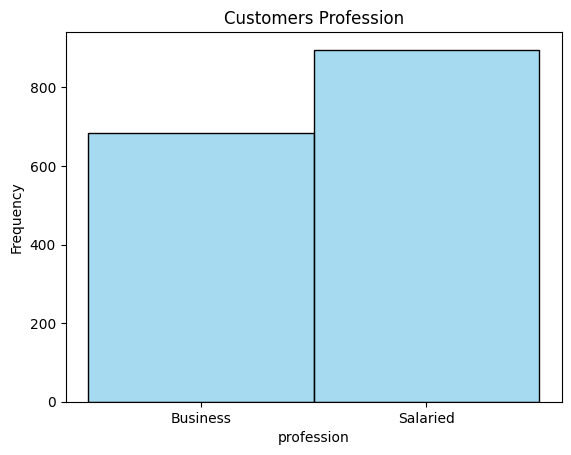

In [42]:
sns.histplot(data=da, x='Profession', color='skyblue')
plt.title('Customers Profession')
plt.xlabel('profession')
plt.ylabel('Frequency');

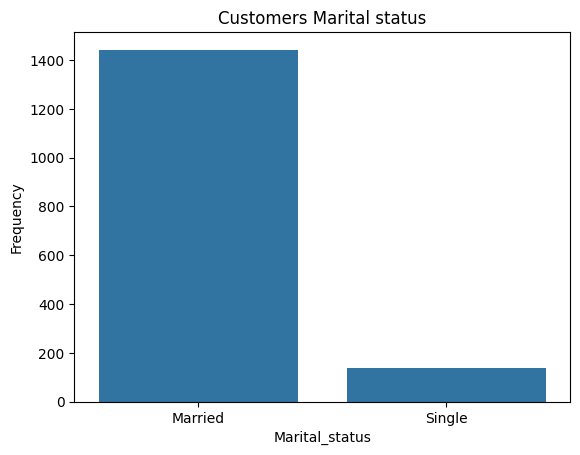

In [43]:
sns.countplot(data=da, x='Marital_status')
plt.title('Customers Marital status')
plt.xlabel('Marital_status')
plt.ylabel('Frequency');

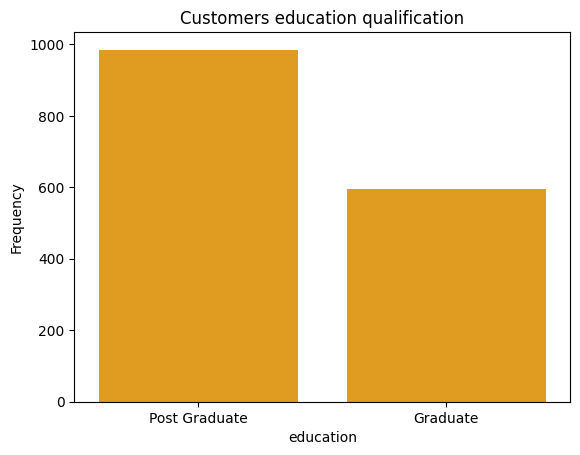

In [44]:
sns.countplot(data=da, x='Education', color='orange')
plt.title('Customers education qualification')
plt.xlabel('education')
plt.ylabel('Frequency');

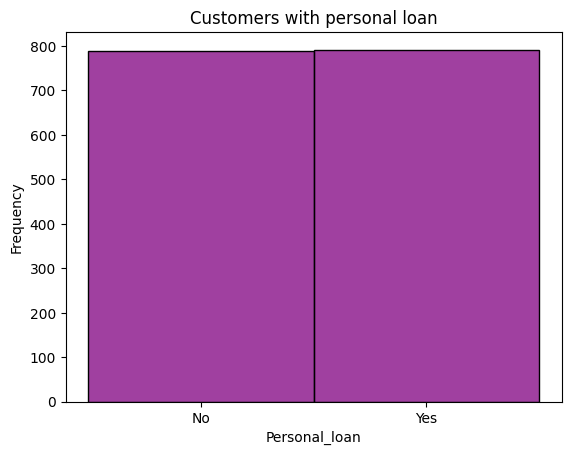

In [45]:
sns.histplot(data=da, x='Personal_loan', color='purple')
plt.title('Customers with personal loan')
plt.xlabel('Personal_loan')
plt.ylabel('Frequency');

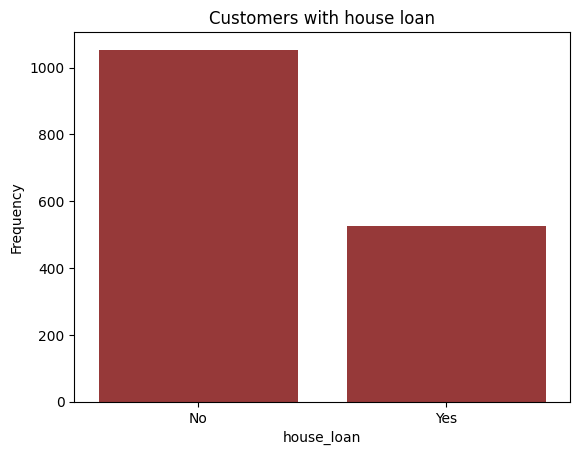

In [46]:
sns.countplot(data=da, x='House_loan', color='brown')
plt.title('Customers with house loan')
plt.xlabel('house_loan')
plt.ylabel('Frequency');

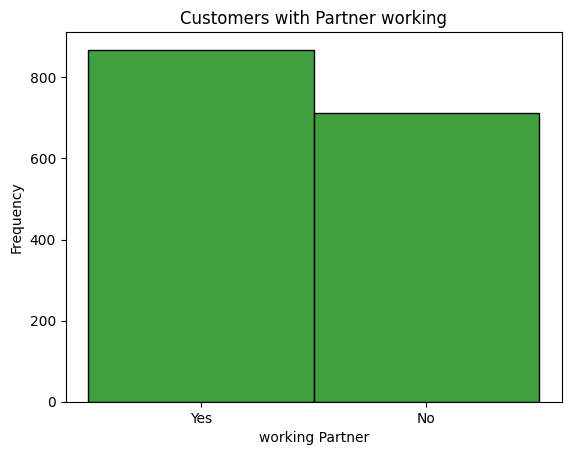

In [47]:
sns.histplot(data=da, x='Partner_working', color='green')
plt.title('Customers with Partner working')
plt.xlabel('working Partner')
plt.ylabel('Frequency');

<ipython-input-48-7a43dadf61cd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=da, x='Make', palette='Set2')


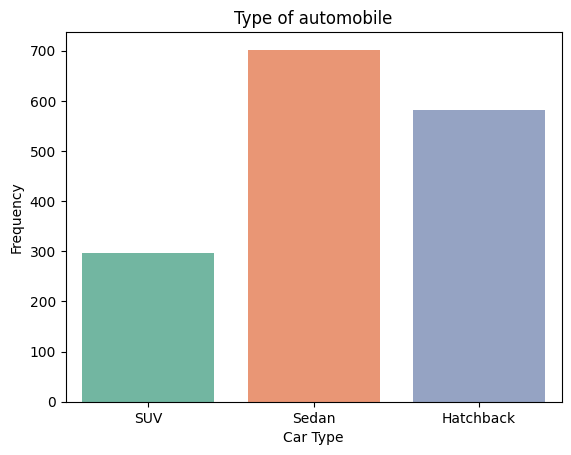

In [48]:
sns.countplot(data=da, x='Make', palette='Set2')
plt.title('Type of automobile')
plt.xlabel('Car Type')
plt.ylabel('Frequency');

In [49]:
# Bivariate Analysis

In [50]:
print(da[numeric_column])

      Age  No_of_Dependents  Salary  Partner_salary  Total_salary  Price
0      53                 4   99300       70700.000        149000  61000
1      53                 4   95500       70300.000        149000  61000
2      53                 3   97300       60700.000        149000  57000
3      53                 2   72500       70300.000        142800  61000
4      53                 3   79700       60200.000        139900  57000
...   ...               ...     ...             ...           ...    ...
1576   22                 2   33300           0.000         33300  27000
1577   22                 4   32000       20226.000         32000  31000
1578   22                 2   32900           0.000         32900  30000
1579   22                 3   32200       20226.000         32200  24000
1580   22                 4   31600           0.000         31600  31000

[1581 rows x 6 columns]


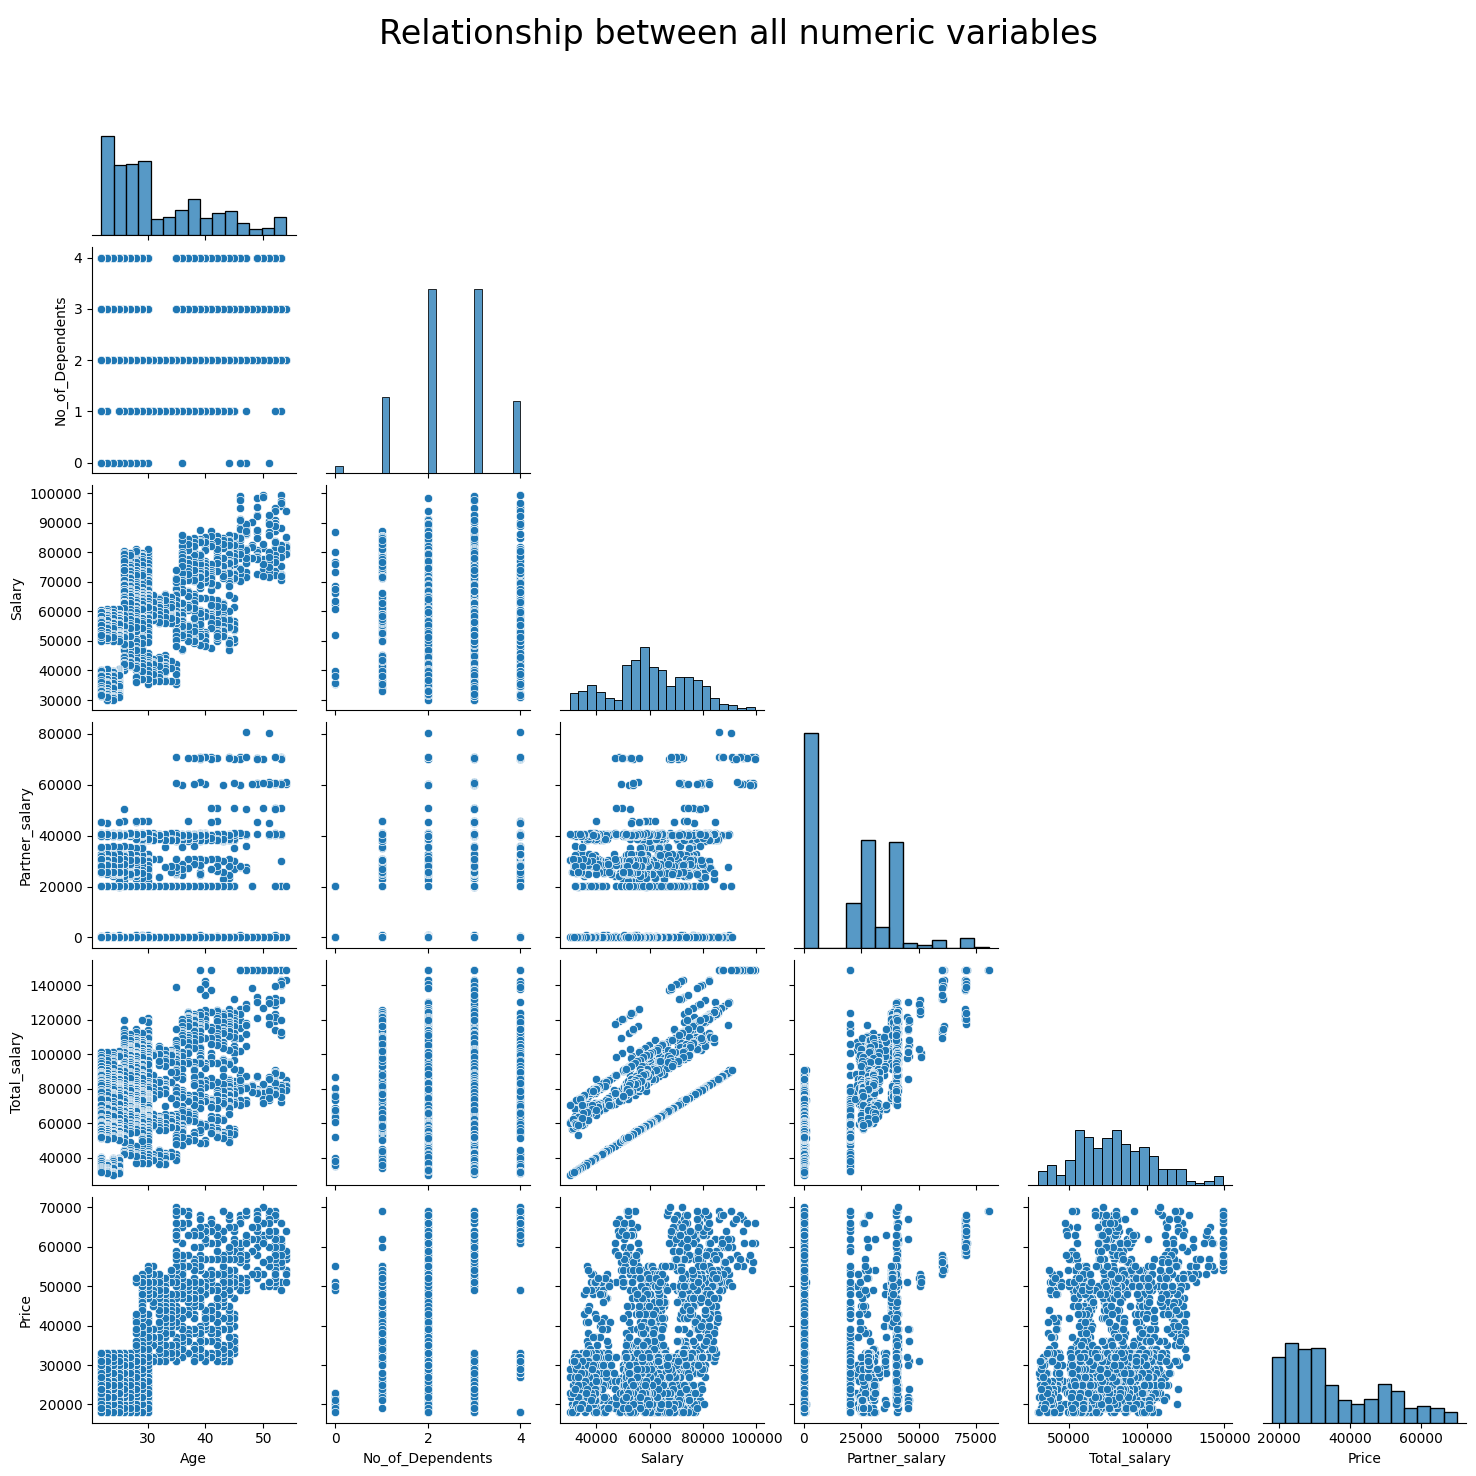

In [51]:
sns.pairplot(da[numeric_column], corner=True)
plt.suptitle('Relationship between all numeric variables', fontsize=24);

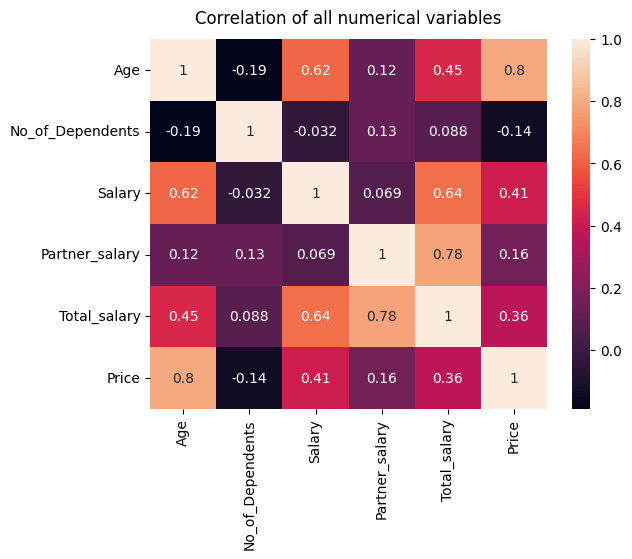

In [52]:
sns.heatmap(data=da[numeric_column].corr(), annot=True)
plt.title('Correlation of all numerical variables', y=1.02);

In [53]:
# Numeric vs Categorical

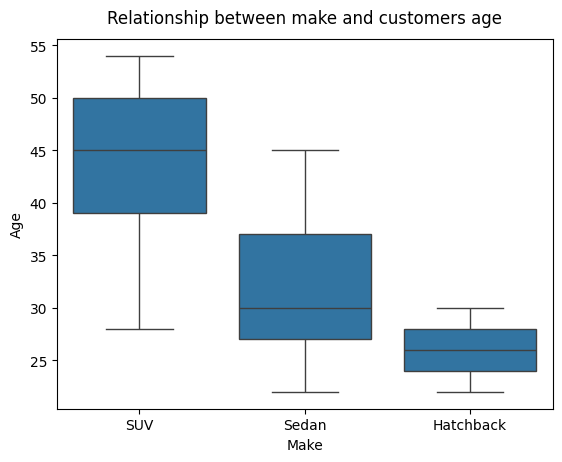

In [54]:
sns.boxplot(data=da, x='Make', y='Age')
plt.title('Relationship between make and customers age', y=1.02);

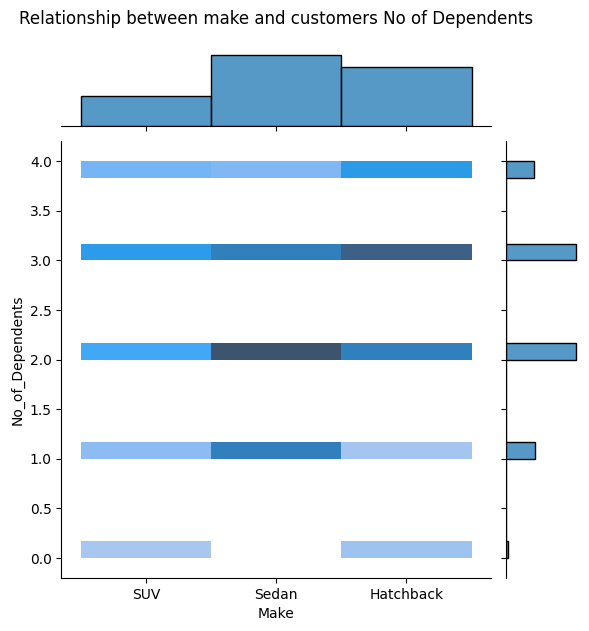

In [55]:
sns.jointplot(data=da, x='Make', y='No_of_Dependents', kind='hist')
plt.title('Relationship between make and customers No of Dependents', y=1.25);

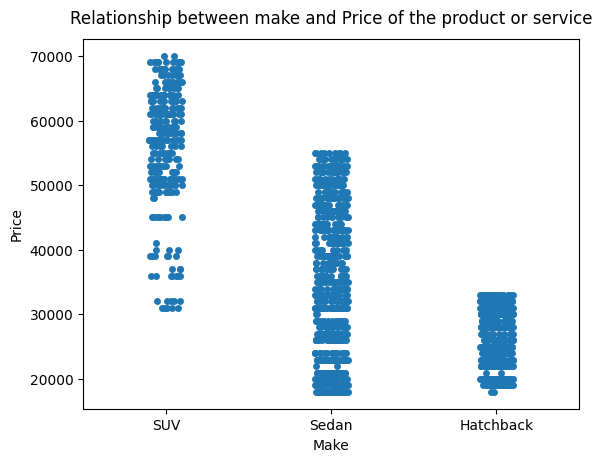

In [56]:
sns.stripplot(data=da, x='Make', y='Price')
plt.title('Relationship between make and Price of the product or service', y=1.02);

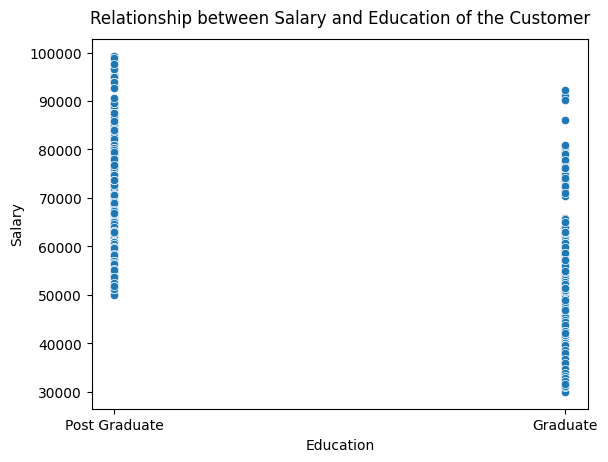

In [57]:
sns.scatterplot(data=da, x='Education', y='Salary')
plt.title('Relationship between Salary and Education of the Customer', y=1.02);

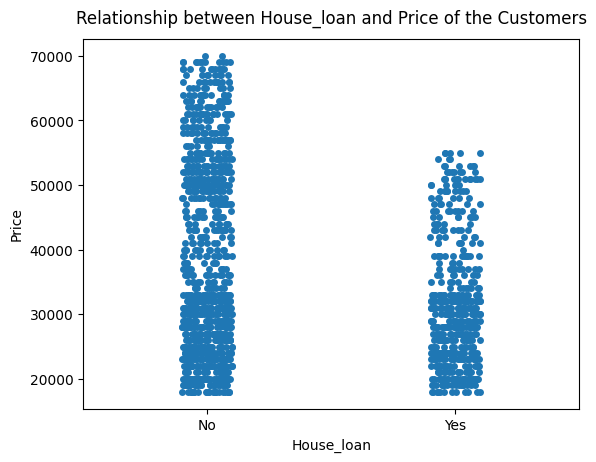

In [58]:
sns.stripplot(data=da, x='House_loan', y='Price')
plt.title('Relationship between House_loan and Price of the Customers', y=1.02);

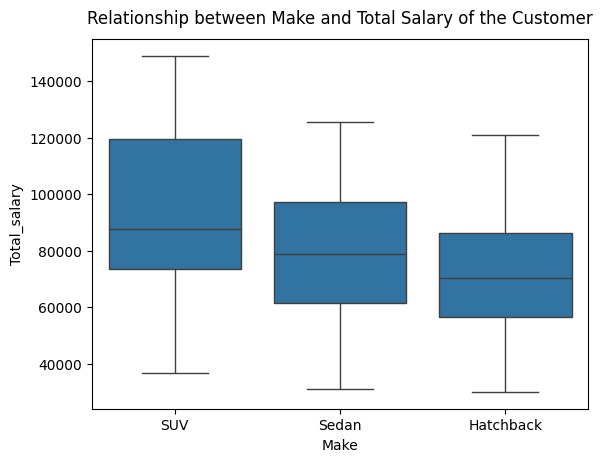

In [59]:
sns.boxplot(data=da, x='Make', y='Total_salary')
plt.title('Relationship between Make and Total Salary of the Customer', y=1.02);

In [60]:
#key questions

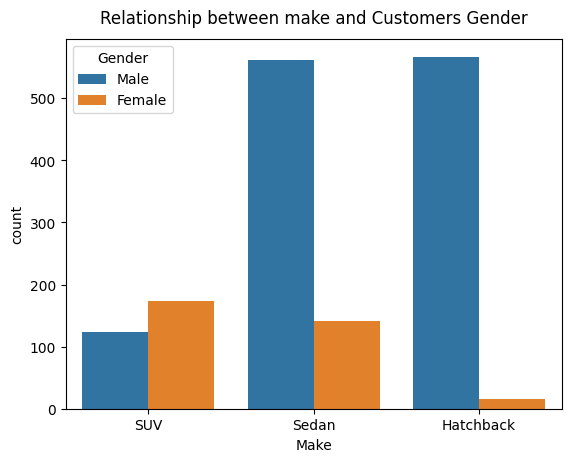

In [61]:
sns.countplot(data=da, x='Make', hue='Gender')
plt.title('Relationship between make and Customers Gender', y=1.02);

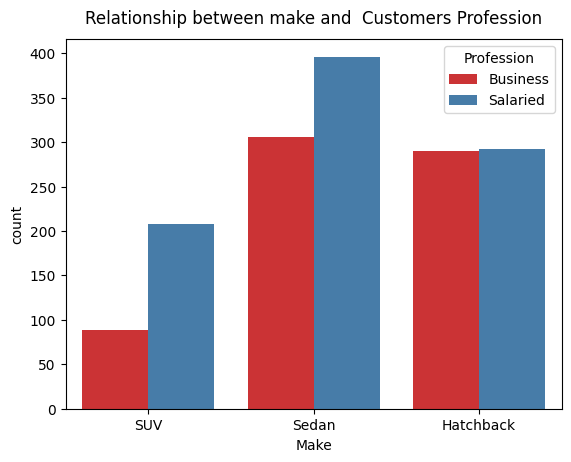

In [62]:
sns.countplot(data=da, x='Make', hue='Profession', palette='Set1')
plt.title('Relationship between make and  Customers Profession', y=1.02);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


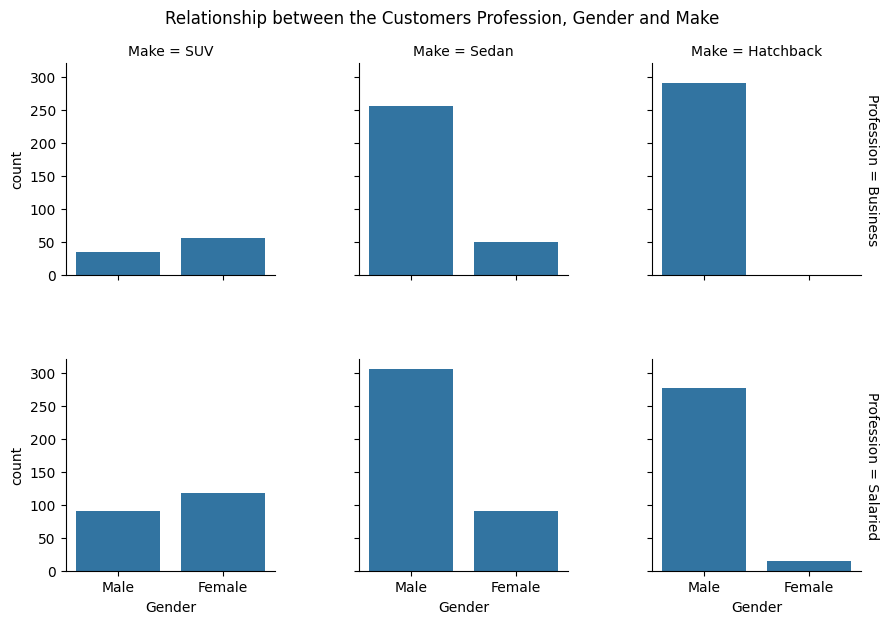

In [63]:
g=sns.FacetGrid(da, col='Make', row='Profession', margin_titles=True)
g.map(sns.countplot,'Gender')
plt.title('Relationship between the Customers Profession, Gender and Make', y=2.55, x=-1)
g.fig.subplots_adjust(hspace=0.4, wspace=0.4);

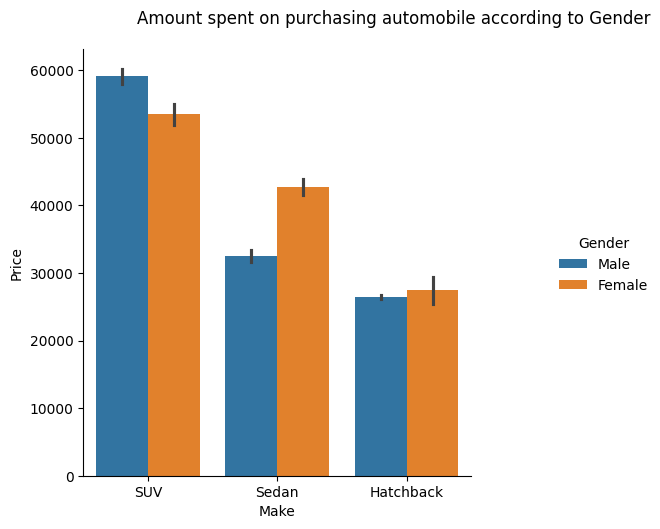

In [64]:
sns.catplot(data=da, x='Make', y='Price', hue='Gender', kind='bar')
plt.title('Amount spent on purchasing automobile according to Gender', y=1.04, x=0.8);

In [65]:
Personal_loan_yes= da[da['Personal_loan']=='Yes']

<ipython-input-66-d32b8a3803d6>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.catplot(data=Personal_loan_yes, x='Make', y='Price', hue="Personal_loan", kind='point', ci=False)


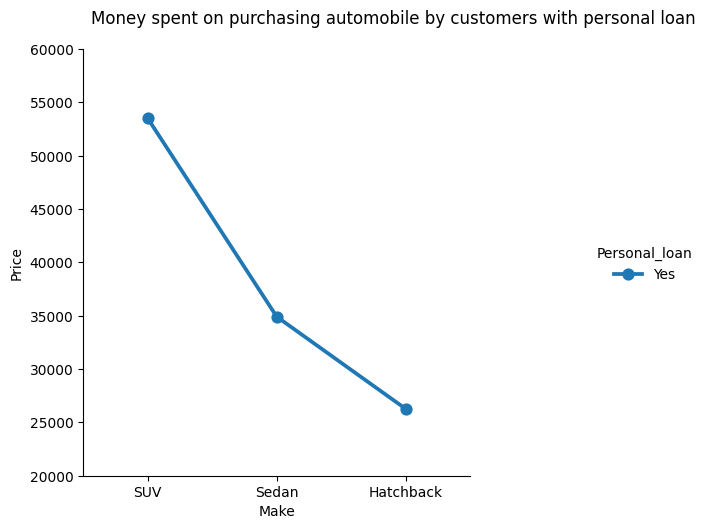

In [66]:
sns.catplot(data=Personal_loan_yes, x='Make', y='Price', hue="Personal_loan", kind='point', ci=False)
plt.title('Money spent on purchasing automobile by customers with personal loan', y=1.04, x=0.8)
plt.yticks(np.arange(20000,65000,5000));


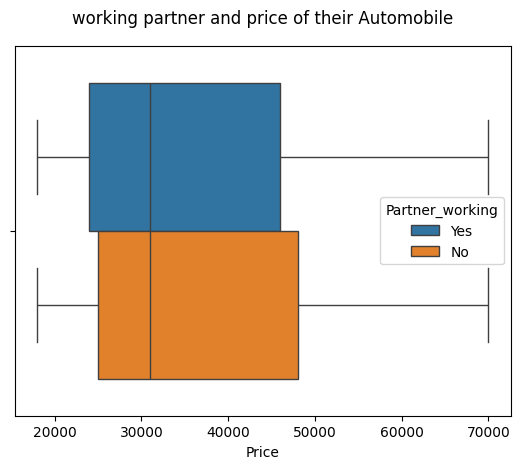

In [67]:
sns.boxplot(data=da,x="Price", hue='Partner_working')
plt.title('working partner and price of their Automobile', y=1.04);